# Ultimate Challenge Part 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
logins = pd.read_json('logins.json')
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
logins['instance'] = 1
logins['minute'] = logins['login_time'].dt.minute
logins['hour'] = logins['login_time'].dt.hour
logins['second'] = logins['login_time'].dt.second
logins['month'] = logins['login_time'].dt.month
logins['day_of_week'] = logins['login_time'].dt.dayofweek
logins['week_of_year'] = logins['login_time'].dt.weekofyear
logins['day_of_month'] = logins['login_time'].dt.day
logins

,login_time,instance,minute,hour,second,month,day_of_week,week_of_year,day_of_month
0,1970-01-01 20:13:18,1,13,20,18,1,3,1,1
1,1970-01-01 20:16:10,1,16,20,10,1,3,1,1
2,1970-01-01 20:16:37,1,16,20,37,1,3,1,1
3,1970-01-01 20:16:36,1,16,20,36,1,3,1,1
4,1970-01-01 20:26:21,1,26,20,21,1,3,1,1
...,...,...,...,...,...,...,...,...,...
93137,1970-04-13 18:50:19,1,50,18,19,4,0,16,13
93138,1970-04-13 18:43:56,1,43,18,56,4,0,16,13
93139,1970-04-13 18:54:02,1,54,18,2,4,0,16,13
93140,1970-04-13 18:57:38,1,57,18,38,4,0,16,13


In [4]:
login_buckets = logins.set_index('login_time').resample('15min').count().reset_index()

In [5]:
logins.login_time.describe()

count                   93142
unique                  92265
top       1970-02-12 11:16:53
freq                        3
first     1970-01-01 20:12:16
last      1970-04-13 18:57:38
Name: login_time, dtype: object

### Logins grouped by 15 minute buckets

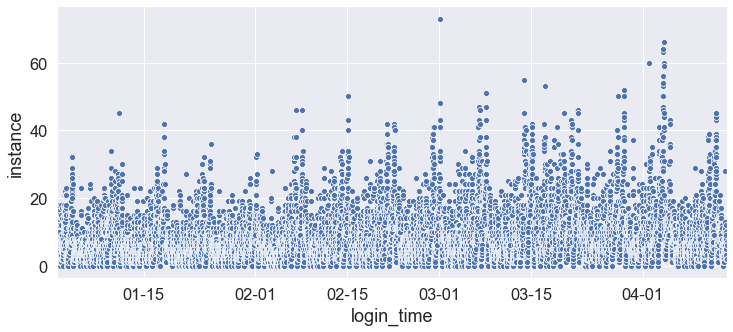

In [6]:
# https://stackoverflow.com/a/58060826
sns.set(rc={'figure.figsize':(12,5)})
sns.set(font_scale=1.5)
ax = sns.scatterplot(data=login_buckets, x="login_time", y="instance")
ax.set_xlim(login_buckets['login_time'].min(), login_buckets['login_time'].max())
myFmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(myFmt)

In [7]:
def analyze_group(df, group_by):
    """
    Displays logins grouped by various time aspects
    
    :param group_by: str, name of feature to group by
    """
    grouped = df.groupby(group_by).count().reset_index()
    ax = sns.scatterplot(data=grouped, x=group_by, y='login_time')
    ax.set(ylabel='login count', ylim=0)
    plt.show()

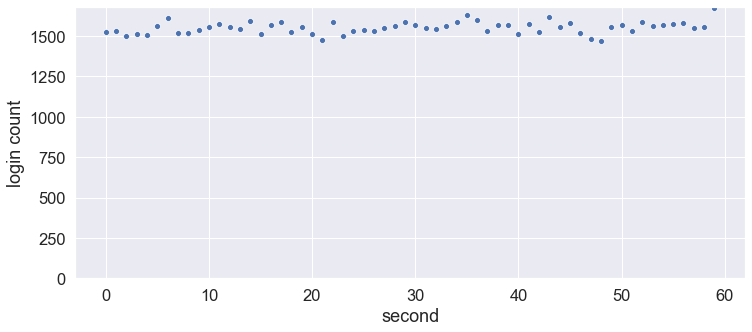

In [8]:
analyze_group(logins, 'second')

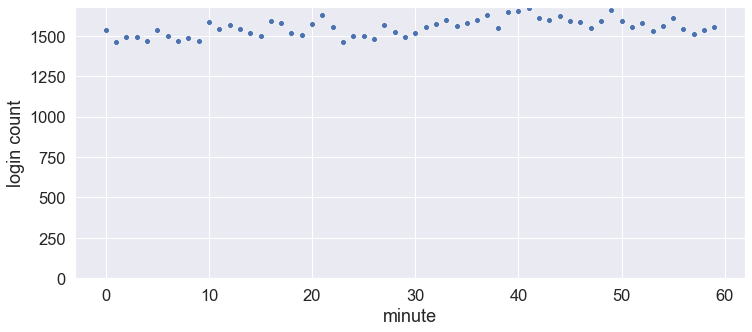

In [9]:
analyze_group(logins, 'minute')

There does not appear to be any noticeable pattern to logins over the course of a minute.   Over the course of an hour, there appears to be more logins in the second half of the hour.

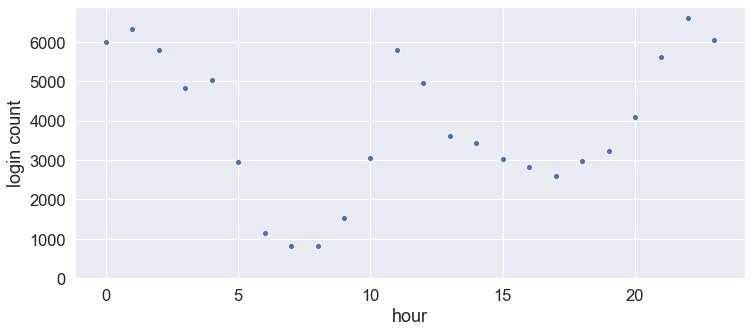

In [10]:
analyze_group(logins, 'hour')

Logins are much higher 11 am and noon (lunchtime) and late at night from 9 pm till about 4 am.   Logins are at their lowest from 7 am till 8 am.

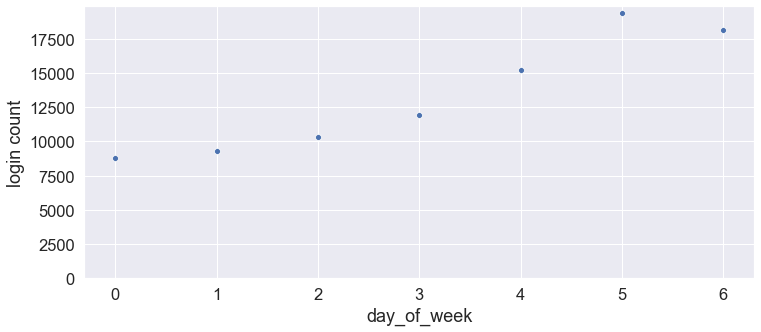

In [11]:
analyze_group(logins, 'day_of_week')

In the above graph, 0 = Monday and 6 = Sunday.    Logins are highest on weekends, and grow over the course of the weekdays in a week.

For the rest of the analysis, we will eliminate data from the last month because we have only partial data for that month.

In [12]:
logins_1q = logins[logins.month <= 3]

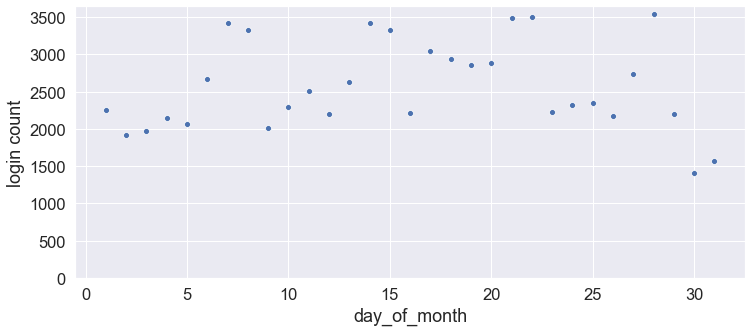

In [13]:
analyze_group(logins_1q, 'day_of_month')

There appear to be more logins in the earlier part of the month, however, we must remember that there is less data for  the end of months,  because the data runs out in the middle of the last month, and some months have less days than others.

Because the last week of data is not complete, we will eliminate it when looking at the trend by week of year.

In [14]:
logins_15w = logins[logins.week_of_year <= 15]

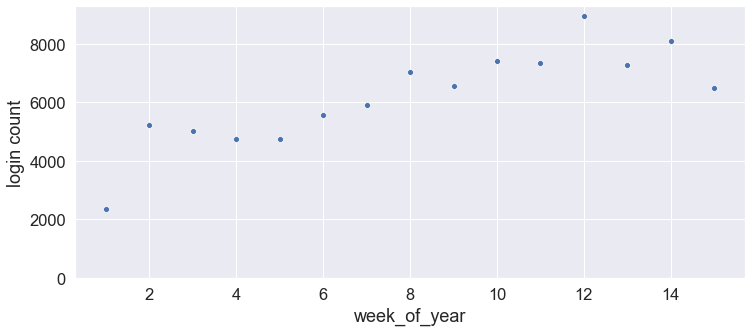

In [15]:
analyze_group(logins_15w, 'week_of_year')

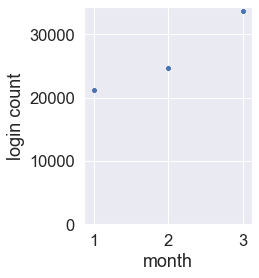

In [16]:
sns.set(rc={'figure.figsize':(3,4)})
sns.set(font_scale=1.5)
analyze_group(logins_1q, 'month')

There is a trend towards more logins over time.